Згенегуємо два набори значень $x$ і $y$.

In [104]:
import numpy as np

x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

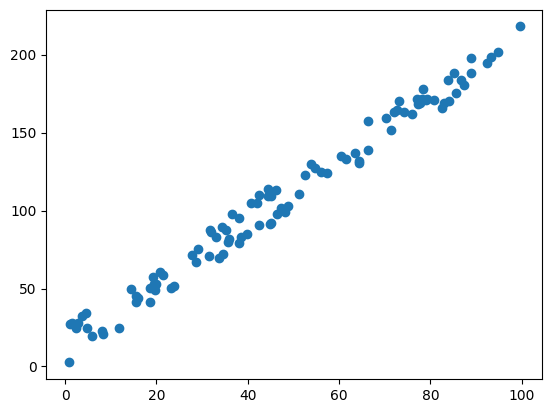

In [105]:
from matplotlib import pyplot as plt

plt.scatter(x, y)

### Завдання.

Знайти значення коефіцієнтів рівняння лінійної регресії $\beta_0$ та $\beta_1$:

1) за допомогою формул з підручника;

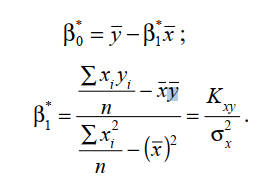

In [106]:
beta1 = (np.mean(x * y) - (x.mean() * y.mean())) / (np.mean(np.power(x, 2)) - np.power(x.mean(), 2))
beta0 = y.mean() - beta1 * x.mean()

print("Beta 0 =", beta0)
print("Beta 1 =", beta1)

Beta 0 = 14.251603443281837
Beta 1 = 1.9732309515097193


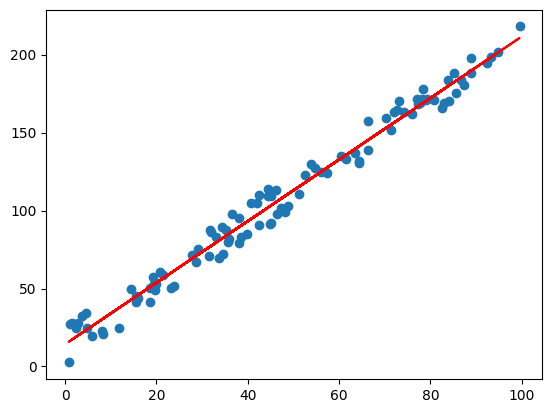

In [107]:
def show_scatter_plot(x, y): 
    plt.scatter(x, y)
    plt.plot(x, beta0 + beta1 * x, c='red')
    plt.show()

show_scatter_plot(x, y)

2) за допомогою моделі sklearn.linear_model.LinearRegression;

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, # перший масив, який потрібно розбити
    y, # другий масив, який потрібно розбити
    test_size=0.2, # розмір меншої групи (20% від загальної кількості даних)
    random_state=42 # фіксація випадкового стану: тепер при перезапуску групи будуть однаковими
)

print('Розмір вибірки для навчання:', len(x_train))
print('Розмір вибірки для тестування:', len(x_test))

Розмір вибірки для навчання: 80
Розмір вибірки для тестування: 20


In [166]:
from sklearn.linear_model import LinearRegression

# ініціалізація моделі
mdl = LinearRegression()

# навчання моделі
mdl = mdl.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

for var_name, coef_value in zip(x, mdl.coef_):
    print(var_name, ': ', coef_value)
    
print('constant term: ', mdl.intercept_)

18.641810024188054 :  [1.96614149]
constant term:  [14.64353808]


In [110]:
from sklearn.metrics import mean_squared_error

mean_forecast = np.ones_like(y_test) * np.mean(y_train) # прогноз, опосередкований на середньому значенні
model_forecast = mdl.predict(x_test.reshape(-1, 1)) # прогноз, заснований на нашій моделі

print('Прогноз, опосередкований на середньому значенні:', mean_forecast)
print('Прогноз, заснований на нашій моделі:', model_forecast)

print('Помилка прогнозу, при середньому значенні:', mean_squared_error(y_test, mean_forecast))
print('Помилка прогнозу з використанням моделі: ', mean_squared_error(y_test, model_forecast))

Прогноз, опосередкований на середньому значенні: [105.72750779 105.72750779 105.72750779 105.72750779 105.72750779
 105.72750779 105.72750779 105.72750779 105.72750779 105.72750779
 105.72750779 105.72750779 105.72750779 105.72750779 105.72750779
 105.72750779 105.72750779 105.72750779 105.72750779 105.72750779]
Прогноз, заснований на нашій моделі: [[ 21.83841477]
 [ 89.48624317]
 [198.15450059]
 [164.21180694]
 [115.37031396]
 [135.63695606]
 [ 16.19538566]
 [ 79.85834711]
 [107.63912478]
 [ 51.29597416]
 [ 86.46786178]
 [169.95724294]
 [173.70205343]
 [117.86163217]
 [127.64845893]
 [ 51.39708747]
 [170.41852474]
 [ 83.77977853]
 [166.47875216]
 [145.01934673]]
Помилка прогнозу, при середньому значенні: 2876.399641439542
Помилка прогнозу з використанням моделі:  47.390065730307455


In [111]:
mdl.predict(x_train[0].reshape(-1, 1)), y_train[0]

(array([[166.36641681]]), 171.33566684553628)

3) знайти передбачення для значення змінної $x$, що рівне 120. 

In [168]:

# print(x_train)
# print(x_train[np.where(x_train > 120)])
mdl.predict(x_train[x_train == 120].reshape(-1, 1))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.